# Часть 1

In [ ]:
import numpy as np
import pandas as pd

In [2]:
data1 = pd.read_csv('data/r4z1.csv')
data2 = pd.read_csv('data/r4z1.csv')

In [3]:
alpha = 0.01
r = 5 # Точки разбиения оси Х
s = 4 # Точки разбиения оси Y
X1 = 116.05
Xr = 124.05
Y1 = 79.05
Ys = 85.05

In [4]:
data1.head()

,X,Y
0,121.0,81.3
1,123.5,77.8
2,119.0,81.9
3,122.4,85.9
4,121.8,82.0


In [5]:

hx = (Xr - X1)/r
hy = (Ys - Y1)/s
X = np.arange(X1, Xr+hx, hx)
X = np.insert(X, 0,-10000000000.0)
X = np.append(X, 100000000.0)
Y = np.arange(Y1, Ys+hy, hy)
Y = np.insert(Y, 0,-10000000000.0)
Y = np.append(Y, 100000000.0)


In [7]:
Y

array([-1.000e+10,  7.905e+01,  8.055e+01,  8.205e+01,  8.355e+01,
        8.505e+01,  1.000e+08])

In [10]:
#print(data1)
for vec in data1:
    print(vec)

X
Y


In [14]:
table = np.zeros((r+1, s+1))

for i in range(1, r+2):
    for j in range(1, s+2):
        for index, row in data1.iterrows():
            if (X[i-1] <row['X'] < X[i]) and (Y[j-1] <row['Y'] < Y[j]):
                table[i-1][j-1] += 1

In [15]:
table

array([[4., 2., 5., 4., 1.],
       [0., 2., 3., 1., 3.],
       [5., 5., 6., 4., 2.],
       [1., 2., 2., 4., 0.],
       [3., 3., 3., 2., 2.],
       [2., 1., 4., 5., 2.]])

In [17]:
np.sum(table, 1)

array([16.,  9., 22.,  9., 13., 14.])

In [21]:
T = 0
n = np.sum(table) # сумма всех элеементов в таблице
ni = np.sum(table, 1) # cуммы строк
nj = np.sum(table, 0) # суммы столбцов
for i in range(r+1):
    for j in range(s+1):
        T += (n*table[i][j] - ni[i]*nj[j])**2/(n*ni[i]*nj[j])
#проверить что с индексами все правильно

In [30]:
from scipy.special import gamma, gammainc

def get_Fchisq(x, df):
    return gammainc(df/2, x/2)/gamma(df/2)

In [31]:
from scipy.stats.distributions import chi2

k = r*s
chi = get_Fchisq(T, df=k)
p_value = 1 -chi 

In [32]:
print(p_value)
if p_value>alpha:
    print('Признаки независимые')
else:
    print("Признаки зависимы")

0.9999995342679185
Признаки независимые


In [33]:
chi

4.657320814777293e-07

# Часть 2

In [69]:
X_check = 117

In [57]:
data2.head()

,X,Y
0,121.0,81.3
1,123.5,77.8
2,119.0,81.9
3,122.4,85.9
4,121.8,82.0


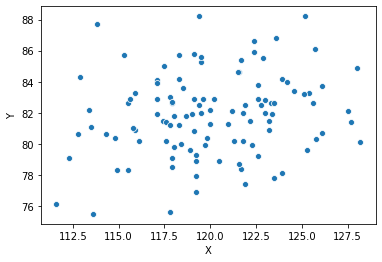

In [59]:
meanX = data2['X'].mean()
meanY = data2['Y'].mean()
varX = data2['X'].var()
varY = data2['Y'].var()

In [61]:
import math 

X = data2['X'].values
Y = data2['Y'].values

corr_coef = np.mean((X - meanX)*(Y- meanY))/math.sqrt(varX*varY)
corr_coef

0.1903420776472742

In [63]:
b = corr_coef*varY/varX
b

0.09337047084854004

In [67]:
Y_cor = meanY + b*(X - meanX)

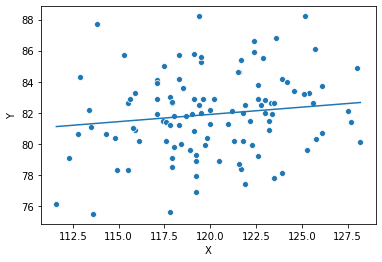

In [68]:
import seaborn as sns

sns.scatterplot(x = data2['X'],y = data2['Y'])
sns.lineplot(X, Y_cor)